In [5]:
!pip install folium

     |████████████████████████████████| 102kB 7.0MB/s ta 0:00:011


In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [8]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [9]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [10]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [13]:
neighborhoods_data = newyork_data['features']

In [14]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [15]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [16]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [17]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [18]:
neighborhoods.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [19]:
newyork_latitude = neighborhoods['Latitude'].mean()
newyork_longitude = neighborhoods['Longitude'].mean()
print("Latitude and Longitude of newyork are : ",newyork_latitude,newyork_longitude)

Latitude and Longitude of newyork are :  40.70136210272565 -73.94625419828469


In [20]:
CLIENT_ID = 'SG3F5UP0YJ24MF0T305TOZLCMWUSKJMGWNGNM5TNDKHF5TI3'
CLIENT_SECRET = '410KLC4DAXGEUIFEGGEJYWDP0DBRIJMPVBXINFT4LQECCMSJ'
VERSION = '20180606'
LIMIT = 50

In [21]:
unique_boroughs_of_newyork = neighborhoods['Borough'].unique().tolist()

In [22]:
unique_boroughs_of_newyork

['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island']

In [23]:
borough_colors ={}
for i in unique_boroughs_of_newyork:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [24]:
borough_colors

{'Bronx': '#068977',
 'Manhattan': '#C07578',
 'Brooklyn': '#B7458A',
 'Queens': '#E54E13',
 'Staten Island': '#EF0731'}

In [25]:
newyork_map = folium.Map(location=[newyork_latitude,newyork_longitude],zoom_start=12,control_scale=True)

In [26]:
for lat,lng,boro,nei in zip(neighborhoods['Latitude'],
                           neighborhoods['Longitude'],
                           neighborhoods['Borough'],
                           neighborhoods['Neighborhood']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(newyork_map)

In [23]:
newyork_map

In [27]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=50):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [30]:
newyork_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],latitudes=neighborhoods['Latitude'],longitudes=neighborhoods['Longitude'],boro=neighborhoods['Borough'])

Fetching venues for :  Wakefield
Fetching venues for :  Co-op City
Fetching venues for :  Eastchester
Fetching venues for :  Fieldston
Fetching venues for :  Riverdale
Fetching venues for :  Kingsbridge
Fetching venues for :  Marble Hill
Fetching venues for :  Woodlawn
Fetching venues for :  Norwood
Fetching venues for :  Williamsbridge
Fetching venues for :  Baychester
Fetching venues for :  Pelham Parkway
Fetching venues for :  City Island
Fetching venues for :  Bedford Park
Fetching venues for :  University Heights
Fetching venues for :  Morris Heights
Fetching venues for :  Fordham
Fetching venues for :  East Tremont
Fetching venues for :  West Farms
Fetching venues for :  High  Bridge
Fetching venues for :  Melrose
Fetching venues for :  Mott Haven
Fetching venues for :  Port Morris
Fetching venues for :  Longwood
Fetching venues for :  Hunts Point
Fetching venues for :  Morrisania
Fetching venues for :  Soundview
Fetching venues for :  Clason Point
Fetching venues for :  Throgs N

In [31]:
print("Total number of venues found in Newyork are : ",newyork_venues.shape[0])

Total number of venues found in Newyork are :  263


In [32]:
newyork_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Eastchester,Bronx,40.887556,-73.827806,Mill wiping rags,40.887808,-73.827795,Paper / Office Supplies Store
1,Kingsbridge,Bronx,40.881687,-73.902818,Mattress Firm,40.881641,-73.903061,Mattress Store
2,Woodlawn,Bronx,40.898273,-73.867315,Rambling House,40.898439,-73.867197,Pub
3,Woodlawn,Bronx,40.898273,-73.867315,Behan's Pub,40.898585,-73.867507,Bar
4,Woodlawn,Bronx,40.898273,-73.867315,Emerald Pharmacy,40.898418,-73.867508,Pharmacy


In [35]:
newyork_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Pizza Place           10
Coffee Shop           10
Chinese Restaurant     9
Deli / Bodega          8
Ice Cream Shop         7
Cosmetics Shop         6
Mexican Restaurant     6
Italian Restaurant     6
Pharmacy               5
Sandwich Place         5
Name: Neighborhood, dtype: int64

In [36]:
print("Total number of unique categories in newyork are : ",len(newyork_venues['Venue Category'].unique()))

Total number of unique categories in newyork are :  120


In [37]:
individual_newyork_venue_count = newyork_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [38]:
individual_newyork_venue_count

Borough
Borough       Neighborhood                
Bronx         City Island                4
              Claremont Village          2
              Concourse Village          1
              Eastchester                1
              Kingsbridge                1
              Mott Haven                 1
              Norwood                    1
              Olinville                  3
              Soundview                  2
              Spuyten Duyvil             1
              Unionport                  1
              West Farms                 1
              Woodlawn                   3
Brooklyn      Bay Ridge                  4
              Bedford Stuyvesant         1
              Brighton Beach             2
              Broadway Junction          2
              Bushwick                   3
              Carroll Gardens            9
              Clinton Hill               4
              Crown Heights              1
              Downtown                   7
              Dumbo                      5
              East Flatbush              3
              Fulton Ferry               8
              Greenpoint                 1
              Homecrest                  4
              Kensington                 1
              Manhattan Beach            2
              Marine Park                4
              North Side                 3
              Ocean Hill                 1
              Park Slope                14
              Prospect Heights           1
              South Side                 2
              Sunset Park                5
Manhattan     Battery Park City          1
              Carnegie Hill              2
              Central Harlem             1
              Chelsea                    3
              Chinatown                  1
              Civic Center               1
              Clinton                    1
              East Harlem                2
              East Village               4
              Financial District         2
              Flatiron                   2
              Gramercy                   1
              Greenwich Village          4
              Inwood                    10
              Lenox Hill                 3
              Lincoln Square             2
              Little Italy              10
              Midtown South              1
              Morningside Heights        6
              Murray Hill                1
              Noho                       8
              Soho                       5
              Sutton Place               1
              Tribeca                    2
              Turtle Bay                 1
              Upper West Side            3
              West Village               3
              Yorkville                  3
Queens        Brookville                 1
              Elmhurst                   1
              Far Rockaway               2
              Flushing                   4
              Glen Oaks                  1
              Howard Beach               1
              Hunters Point             12
              Jamaica Center             6
              Jamaica Hills              1
              Long Island City          10
              North Corona               2
              Oakland Gardens            1
              Ozone Park                 1
              Rego Park                  1
              Rockaway Beach             2
              Roxbury                    1
              Steinway                   3
Staten Island Arlington                  1
              Charleston                 1
              Concord                    3
              Emerson Hill               1
              Huguenot                   1
              Lighthouse Hill            1
              Manor Heights              1
              Port Richmond              2
              Prince's Bay               2
              Richmond Valley            1
              Stapleton             

In [39]:
individual_newyork_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [40]:
individual_newyork_venue_count.reset_index(inplace=True)

In [41]:
individual_newyork_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Bronx,City Island,4
1,Bronx,Claremont Village,2
2,Bronx,Concourse Village,1
3,Bronx,Eastchester,1
4,Bronx,Kingsbridge,1
5,Bronx,Mott Haven,1
6,Bronx,Norwood,1
7,Bronx,Olinville,3
8,Bronx,Soundview,2
9,Bronx,Spuyten Duyvil,1


In [42]:
import seaborn as sns

[Text(0, 0, 'City Island'),
 Text(0, 0, 'Claremont Village'),
 Text(0, 0, 'Concourse Village'),
 Text(0, 0, 'Eastchester'),
 Text(0, 0, 'Kingsbridge'),
 Text(0, 0, 'Mott Haven'),
 Text(0, 0, 'Norwood'),
 Text(0, 0, 'Olinville'),
 Text(0, 0, 'Soundview'),
 Text(0, 0, 'Spuyten Duyvil'),
 Text(0, 0, 'Unionport'),
 Text(0, 0, 'West Farms'),
 Text(0, 0, 'Woodlawn'),
 Text(0, 0, 'Bay Ridge'),
 Text(0, 0, 'Bedford Stuyvesant'),
 Text(0, 0, 'Brighton Beach'),
 Text(0, 0, 'Broadway Junction'),
 Text(0, 0, 'Bushwick'),
 Text(0, 0, 'Carroll Gardens'),
 Text(0, 0, 'Clinton Hill'),
 Text(0, 0, 'Crown Heights'),
 Text(0, 0, 'Downtown'),
 Text(0, 0, 'Dumbo'),
 Text(0, 0, 'East Flatbush'),
 Text(0, 0, 'Fulton Ferry'),
 Text(0, 0, 'Greenpoint'),
 Text(0, 0, 'Homecrest'),
 Text(0, 0, 'Kensington'),
 Text(0, 0, 'Manhattan Beach'),
 Text(0, 0, 'Marine Park'),
 Text(0, 0, 'North Side'),
 Text(0, 0, 'Ocean Hill'),
 Text(0, 0, 'Park Slope'),
 Text(0, 0, 'Prospect Heights'),
 Text(0, 0, 'South Side'),
 Text(0

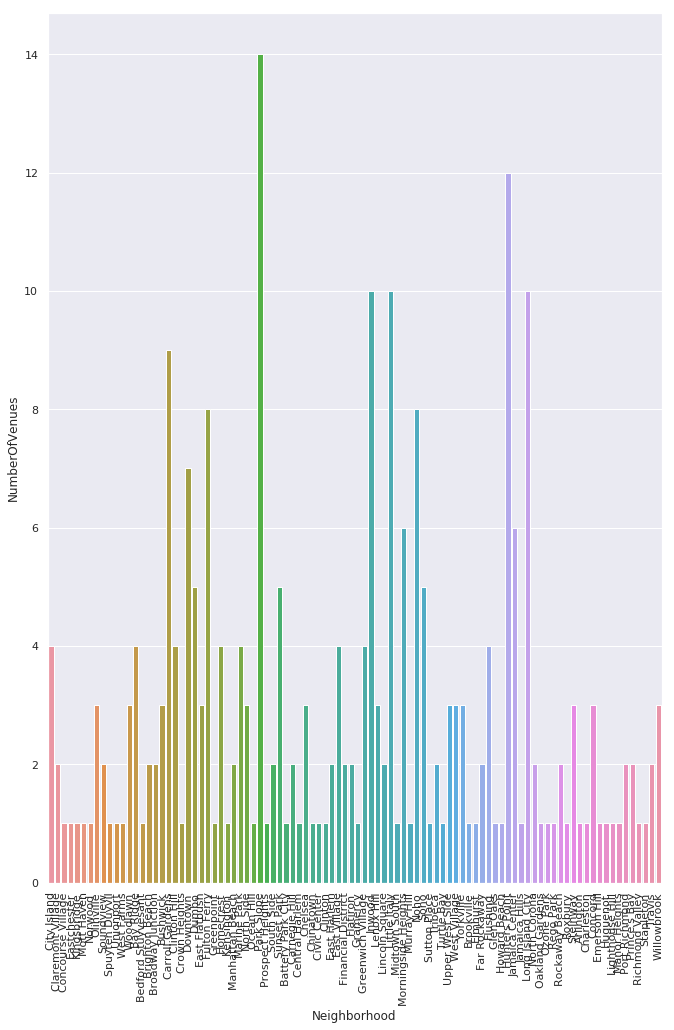

In [43]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_newyork_venue_count)
plot.set_xticklabels(individual_newyork_venue_count['Neighborhood'],rotation=90)

In [44]:
newyork_venues[newyork_venues['Neighborhood']=='West Village']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
142,West Village,Manhattan,40.734434,-74.00618,Decoy,40.734182,-74.006462,Chinese Restaurant
143,West Village,Manhattan,40.734434,-74.00618,Katana Kitten,40.734236,-74.006267,Cocktail Bar
144,West Village,Manhattan,40.734434,-74.00618,RedFarm,40.734194,-74.006268,Chinese Restaurant


In [45]:
newyork_venues_onehot = pd.get_dummies(newyork_venues[['Venue Category']])

In [46]:
newyork_venues_onehot

,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_American Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Field,Venue Category_Beach,Venue Category_Beer Garden,Venue Category_Big Box Store,Venue Category_Bike Shop,Venue Category_Boat or Ferry,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Boxing Gym,Venue Category_Building,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Caucasian Restaurant,Venue Category_Cheese Shop,Venue Category_Chinese Restaurant,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Concert Hall,Venue Category_Construction & Landscaping,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Donut Shop,Venue Category_Falafel Restaurant,Venue Category_Farmers Market,Venue Category_Filipino Restaurant,Venue Category_Food,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Gourmet Shop,Venue Category_Greek Restaurant,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Historic Site,Venue Category_Hookah Bar,Venue Category_Hotel,Venue Category_Hotpot Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indoor Play Area,Venue Category_Italian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Kids Store,Venue Category_Korean Restaurant,Venue Category_Latin American Restaurant,Venue Category_Library,Venue Category_Lingerie Store,Venue Category_Liquor Store,Venue Category_Malay Restaurant,Venue Category_Mattress Store,Venue Category_Mediterranean Restaurant,Venue Category_Men's Store,Venue Category_Metro Station,Venue Category_Mexican Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Mobile Phone Shop,Venue Category_Monument / Landmark,Venue Category_Movie Theater,Venue Category_Moving Target,Venue Category_Museum,Venue Category_Nail Salon,Venue Category_New American Restaurant,Venue Category_Opera House,Venue Category_Other Great Outdoors,Venue Category_Paper / Office Supplies Store,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pet Store,Venue Category_Pharmacy,Venue Category_Pier,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Pool Hall,Venue Category_Pub,Venue Category_Racetrack,Venue Category_Residential Building (Apartment / Condo),Venue Category_Restaurant,Venue Category_Rock Climbing Spot,Venue Category_Sandwich Place,Venue Category_Shipping Store,Venue Category_Shopping Mall,Venue Category_Smoothie Shop,Venue Category_Southern / Soul Food Restaurant,Venue Category_Spa,Venue Category_Spanish Restaurant,Venue Category_Speakeasy,Venue Category_Sporting Goods Shop,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tattoo Parlor,Venue Category_Thai Restaurant,Venue Category_Toy / Game Store,Venue Category_Varenyky restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [51]:
newyork_venues_onehot['Neighborhood'] = newyork_venues['Neighborhood']
newyork_venues_grouped = newyork_venues_onehot.groupby('Neighborhood').mean().reset_index()
newyork_venues_grouped

,Neighborhood,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_American Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Field,Venue Category_Beach,Venue Category_Beer Garden,Venue Category_Big Box Store,Venue Category_Bike Shop,Venue Category_Boat or Ferry,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Boxing Gym,Venue Category_Building,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Caucasian Restaurant,Venue Category_Cheese Shop,Venue Category_Chinese Restaurant,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Concert Hall,Venue Category_Construction & Landscaping,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Donut Shop,Venue Category_Falafel Restaurant,Venue Category_Farmers Market,Venue Category_Filipino Restaurant,Venue Category_Food,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Gourmet Shop,Venue Category_Greek Restaurant,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Historic Site,Venue Category_Hookah Bar,Venue Category_Hotel,Venue Category_Hotpot Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indoor Play Area,Venue Category_Italian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Kids Store,Venue Category_Korean Restaurant,Venue Category_Latin American Restaurant,Venue Category_Library,Venue Category_Lingerie Store,Venue Category_Liquor Store,Venue Category_Malay Restaurant,Venue Category_Mattress Store,Venue Category_Mediterranean Restaurant,Venue Category_Men's Store,Venue Category_Metro Station,Venue Category_Mexican Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Mobile Phone Shop,Venue Category_Monument / Landmark,Venue Category_Movie Theater,Venue Category_Moving Target,Venue Category_Museum,Venue Category_Nail Salon,Venue Category_New American Restaurant,Venue Category_Opera House,Venue Category_Other Great Outdoors,Venue Category_Paper / Office Supplies Store,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pet Store,Venue Category_Pharmacy,Venue Category_Pier,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Pool Hall,Venue Category_Pub,Venue Category_Racetrack,Venue Category_Residential Building (Apartment / Condo),Venue Category_Restaurant,Venue Category_Rock Climbing Spot,Venue Category_Sandwich Place,Venue Category_Shipping Store,Venue Category_Shopping Mall,Venue Category_Smoothie Shop,Venue Category_Southern / Soul Food Restaurant,Venue Category_Spa,Venue Category_Spanish Restaurant,Venue Category_Speakeasy,Venue Category_Sporting Goods Shop,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tattoo Parlor,Venue Category_Thai Restaurant,Venue Category_Toy / Game Store,Venue Category_Varenyky restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Arlington,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.

In [52]:
number_of_top_venues = 5

In [53]:
for hood in newyork_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = newyork_venues_grouped[newyork_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Arlington ---------
                                       Venue  Frequency
0  Venue Category_Construction & Landscaping        1.0
1          Venue Category_Italian Restaurant        0.0
2                    Venue Category_Pharmacy        0.0
3                   Venue Category_Pet Store        0.0
4       Venue Category_Performing Arts Venue        0.0


--------- Battery Park City ---------
                                  Venue  Frequency
0             Venue Category_Playground        1.0
1      Venue Category_Accessories Store        0.0
2               Venue Category_Pharmacy        0.0
3  Venue Category_Performing Arts Venue        0.0
4                   Venue Category_Park        0.0


--------- Bay Ridge ---------
                                 Venue  Frequency
0             Venue Category_Pool Hall       0.25
1  Venue Category_Caucasian Restaurant       0.25
2      Venue Category_Greek Restaurant       0.25
3        Venue Category_Cosmetics Shop       0.25
4     

In [54]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [55]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = newyork_venues_grouped['Neighborhood']

for ind in np.arange(newyork_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newyork_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arlington,Venue Category_Construction & Landscaping,Venue Category_Women's Store,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Donut Shop
1,Battery Park City,Venue Category_Playground,Venue Category_Yoga Studio,Venue Category_Concert Hall,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store
2,Bay Ridge,Venue Category_Cosmetics Shop,Venue Category_Pool Hall,Venue Category_Caucasian Restaurant,Venue Category_Greek Restaurant,Venue Category_Yoga Studio,Venue Category_Food,Venue Category_Convenience Store,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop
3,Bedford Stuyvesant,Venue Category_Bus Station,Venue Category_Yoga Studio,Venue Category_Construction & Landscaping,Venue Category_Cosmetics Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Donut Shop
4,Brighton Beach,Venue Category_Varenyky restaurant,Venue Category_Restaurant,Venue Category_Yoga Studio,Venue Category_Food Court,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner


In [56]:
neighborhoods_venues_sorted.shape

(94, 11)

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

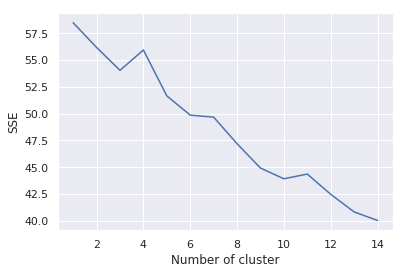

In [58]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(newyork_venues_grouped.drop('Neighborhood',axis=1))
    newyork_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [59]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [60]:
kmeans.fit(newyork_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [61]:
newyork_venues_grouped['Cluster'] = kmeans.labels_

In [62]:
newyork_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    57
1    11
2     8
3    10
4     8
Name: Neighborhood, dtype: int64

In [63]:
newyork_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_Accessories Store',
       'Venue Category_Afghan Restaurant',
       'Venue Category_American Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Arts & Crafts Store', 'Venue Category_Bagel Shop',
       'Venue Category_Bakery', 'Venue Category_Bank', 'Venue Category_Bar',
       ...
       'Venue Category_Thai Restaurant', 'Venue Category_Toy / Game Store',
       'Venue Category_Varenyky restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Wine Bar',
       'Venue Category_Wine Shop', 'Venue Category_Women's Store',
       'Venue Category_Yoga Studio', 'Cluster'],
      dtype='object', length=122)

In [64]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(newyork_venues_grouped,on='Neighborhood')

In [65]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_American Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Field,Venue Category_Beach,Venue Category_Beer Garden,Venue Category_Big Box Store,Venue Category_Bike Shop,Venue Category_Boat or Ferry,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Boxing Gym,Venue Category_Building,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Caucasian Restaurant,Venue Category_Cheese Shop,Venue Category_Chinese Restaurant,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Concert Hall,Venue Category_Construction & Landscaping,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Donut Shop,Venue Category_Falafel Restaurant,Venue Category_Farmers Market,Venue Category_Filipino Restaurant,Venue Category_Food,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Gourmet Shop,Venue Category_Greek Restaurant,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Historic Site,Venue Category_Hookah Bar,Venue Category_Hotel,Venue Category_Hotpot Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indoor Play Area,Venue Category_Italian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Kids Store,Venue Category_Korean Restaurant,Venue Category_Latin American Restaurant,Venue Category_Library,Venue Category_Lingerie Store,Venue Category_Liquor Store,Venue Category_Malay Restaurant,Venue Category_Mattress Store,Venue Category_Mediterranean Restaurant,Venue Category_Men's Store,Venue Category_Metro Station,Venue Category_Mexican Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Mobile Phone Shop,Venue Category_Monument / Landmark,Venue Category_Movie Theater,Venue Category_Moving Target,Venue Category_Museum,Venue Category_Nail Salon,Venue Category_New American Restaurant,Venue Category_Opera House,Venue Category_Other Great Outdoors,Venue Category_Paper / Office Supplies Store,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pet Store,Venue Category_Pharmacy,Venue Category_Pier,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Pool Hall,Venue Category_Pub,Venue Category_Racetrack,Venue Category_Residential Building (Apartment / Condo),Venue Category_Restaurant,Venue Category_Rock Climbing Spot,Venue Category_Sandwich Place,Venue Category_Shipping Store,Venue Category_Shopping Mall,Venue Category_Smoothie Shop,Venue Category_Southern / Soul Food Restaurant,Venue Category_Spa,Venue Category_Spanish Restaurant,Venue Category_Speakeasy,Venue Category_Sporting Goods Shop,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tattoo Parlor,Venue Category_Thai Restaurant,Venue Category_Toy / Game Store,Venue Category_Varenyky restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Arlington,Venue Category_Construction & Landscaping,Venue Category_Women's Store,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_D

In [66]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(newyork_venues,on='Neighborhood')

In [67]:
# create map
map_clusters = folium.Map(location=[newyork_latitude, newyork_longitude], zoom_start=11)

In [68]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [69]:
map_clusters

In [70]:
newyork_venues_grouped.head(1)

,Neighborhood,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_American Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Field,Venue Category_Beach,Venue Category_Beer Garden,Venue Category_Big Box Store,Venue Category_Bike Shop,Venue Category_Boat or Ferry,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Boxing Gym,Venue Category_Building,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Caucasian Restaurant,Venue Category_Cheese Shop,Venue Category_Chinese Restaurant,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Concert Hall,Venue Category_Construction & Landscaping,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Donut Shop,Venue Category_Falafel Restaurant,Venue Category_Farmers Market,Venue Category_Filipino Restaurant,Venue Category_Food,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Gourmet Shop,Venue Category_Greek Restaurant,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Historic Site,Venue Category_Hookah Bar,Venue Category_Hotel,Venue Category_Hotpot Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indoor Play Area,Venue Category_Italian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Kids Store,Venue Category_Korean Restaurant,Venue Category_Latin American Restaurant,Venue Category_Library,Venue Category_Lingerie Store,Venue Category_Liquor Store,Venue Category_Malay Restaurant,Venue Category_Mattress Store,Venue Category_Mediterranean Restaurant,Venue Category_Men's Store,Venue Category_Metro Station,Venue Category_Mexican Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Mobile Phone Shop,Venue Category_Monument / Landmark,Venue Category_Movie Theater,Venue Category_Moving Target,Venue Category_Museum,Venue Category_Nail Salon,Venue Category_New American Restaurant,Venue Category_Opera House,Venue Category_Other Great Outdoors,Venue Category_Paper / Office Supplies Store,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pet Store,Venue Category_Pharmacy,Venue Category_Pier,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Pool Hall,Venue Category_Pub,Venue Category_Racetrack,Venue Category_Residential Building (Apartment / Condo),Venue Category_Restaurant,Venue Category_Rock Climbing Spot,Venue Category_Sandwich Place,Venue Category_Shipping Store,Venue Category_Shopping Mall,Venue Category_Smoothie Shop,Venue Category_Southern / Soul Food Restaurant,Venue Category_Spa,Venue Category_Spanish Restaurant,Venue Category_Speakeasy,Venue Category_Sporting Goods Shop,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tattoo Parlor,Venue Category_Thai Restaurant,Venue Category_Toy / Game Store,Venue Category_Varenyky restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Arlington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [71]:
newyork_veg = newyork_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
newyork_veg.head()

,Neighborhood,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_American Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Field,Venue Category_Beach,Venue Category_Beer Garden,Venue Category_Big Box Store,Venue Category_Bike Shop,Venue Category_Boat or Ferry,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Boxing Gym,Venue Category_Building,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Caucasian Restaurant,Venue Category_Cheese Shop,Venue Category_Chinese Restaurant,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Concert Hall,Venue Category_Construction & Landscaping,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Donut Shop,Venue Category_Falafel Restaurant,Venue Category_Farmers Market,Venue Category_Filipino Restaurant,Venue Category_Food,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Gourmet Shop,Venue Category_Greek Restaurant,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Historic Site,Venue Category_Hookah Bar,Venue Category_Hotel,Venue Category_Hotpot Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indoor Play Area,Venue Category_Italian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Kids Store,Venue Category_Korean Restaurant,Venue Category_Latin American Restaurant,Venue Category_Library,Venue Category_Lingerie Store,Venue Category_Liquor Store,Venue Category_Malay Restaurant,Venue Category_Mattress Store,Venue Category_Mediterranean Restaurant,Venue Category_Men's Store,Venue Category_Metro Station,Venue Category_Mexican Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Mobile Phone Shop,Venue Category_Monument / Landmark,Venue Category_Movie Theater,Venue Category_Moving Target,Venue Category_Museum,Venue Category_Nail Salon,Venue Category_New American Restaurant,Venue Category_Opera House,Venue Category_Other Great Outdoors,Venue Category_Paper / Office Supplies Store,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pet Store,Venue Category_Pharmacy,Venue Category_Pier,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Pool Hall,Venue Category_Pub,Venue Category_Racetrack,Venue Category_Residential Building (Apartment / Condo),Venue Category_Restaurant,Venue Category_Rock Climbing Spot,Venue Category_Sandwich Place,Venue Category_Shipping Store,Venue Category_Shopping Mall,Venue Category_Smoothie Shop,Venue Category_Southern / Soul Food Restaurant,Venue Category_Spa,Venue Category_Spanish Restaurant,Venue Category_Speakeasy,Venue Category_Sporting Goods Shop,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tattoo Parlor,Venue Category_Thai Restaurant,Venue Category_Toy / Game Store,Venue Category_Varenyky restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Arlington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Battery Park City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [104]:
newyork_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    1
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    1
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    0
93    0
Name: Venue Category_Vegetarian / Vegan Restaurant, dtype: uint8

In [72]:
newyork_veg = newyork_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [73]:
newyork_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [79]:
newyork_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Arlington,0,1.0
1,Battery Park City,0,1.0
2,Bay Ridge,0,1.0
3,Bedford Stuyvesant,0,1.0
4,Brighton Beach,0,1.0
5,Broadway Junction,0,1.0
6,Brookville,0,1.0
7,Bushwick,0,1.0
8,Carnegie Hill,0,1.0
9,Carroll Gardens,1,0.0


In [75]:
newyork_veg['NumberOfNonVeganrestaurants'] = 1-(newyork_veg['NumberOfVegRestaurants']/newyork_veg['NumberOfVegRestaurants'].max(axis=0))

In [81]:
newyork_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Arlington,0,1.0
1,Battery Park City,0,1.0
2,Bay Ridge,0,1.0
3,Bedford Stuyvesant,0,1.0
4,Brighton Beach,0,1.0
5,Broadway Junction,0,1.0
6,Brookville,0,1.0
7,Bushwick,0,1.0
8,Carnegie Hill,0,1.0
9,Carroll Gardens,1,0.0


In [82]:
newyork_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

In [83]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='West Village']

In [85]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_American Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Field,Venue Category_Beach,Venue Category_Beer Garden,Venue Category_Big Box Store,Venue Category_Bike Shop,Venue Category_Boat or Ferry,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Boxing Gym,Venue Category_Building,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Caucasian Restaurant,Venue Category_Cheese Shop,Venue Category_Chinese Restaurant,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Concert Hall,Venue Category_Construction & Landscaping,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Donut Shop,Venue Category_Falafel Restaurant,Venue Category_Farmers Market,Venue Category_Filipino Restaurant,Venue Category_Food,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Gourmet Shop,Venue Category_Greek Restaurant,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Historic Site,Venue Category_Hookah Bar,Venue Category_Hotel,Venue Category_Hotpot Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indoor Play Area,Venue Category_Italian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Kids Store,Venue Category_Korean Restaurant,Venue Category_Latin American Restaurant,Venue Category_Library,Venue Category_Lingerie Store,Venue Category_Liquor Store,Venue Category_Malay Restaurant,Venue Category_Mattress Store,Venue Category_Mediterranean Restaurant,Venue Category_Men's Store,Venue Category_Metro Station,Venue Category_Mexican Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Mobile Phone Shop,Venue Category_Monument / Landmark,Venue Category_Movie Theater,Venue Category_Moving Target,Venue Category_Museum,Venue Category_Nail Salon,Venue Category_New American Restaurant,Venue Category_Opera House,Venue Category_Other Great Outdoors,Venue Category_Paper / Office Supplies Store,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pet Store,Venue Category_Pharmacy,Venue Category_Pier,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Pool Hall,Venue Category_Pub,Venue Category_Racetrack,Venue Category_Residential Building (Apartment / Condo),Venue Category_Restaurant,Venue Category_Rock Climbing Spot,Venue Category_Sandwich Place,Venue Category_Shipping Store,Venue Category_Shopping Mall,Venue Category_Smoothie Shop,Venue Category_Southern / Soul Food Restaurant,Venue Category_Spa,Venue Category_Spanish Restaurant,Venue Category_Speakeasy,Venue Category_Sporting Goods Shop,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tattoo Parlor,Venue Category_Thai Restaurant,Venue Category_Toy / Game Store,Venue Category_Varenyky restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,251,West Village,Venue Category_Chinese Restaurant,Venue Category_Cocktail Bar,Venue Category_Yoga Studio,Venu

In [86]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [87]:
target_cluster

4

In [88]:
print("The target cluster is : ",target_cluster)

The target cluster is :  4


In [90]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_American Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Field,Venue Category_Beach,Venue Category_Beer Garden,Venue Category_Big Box Store,Venue Category_Bike Shop,Venue Category_Boat or Ferry,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Boxing Gym,Venue Category_Building,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Caucasian Restaurant,Venue Category_Cheese Shop,Venue Category_Chinese Restaurant,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Concert Hall,Venue Category_Construction & Landscaping,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Donut Shop,Venue Category_Falafel Restaurant,Venue Category_Farmers Market,Venue Category_Filipino Restaurant,Venue Category_Food,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Gourmet Shop,Venue Category_Greek Restaurant,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Historic Site,Venue Category_Hookah Bar,Venue Category_Hotel,Venue Category_Hotpot Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indoor Play Area,Venue Category_Italian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Kids Store,Venue Category_Korean Restaurant,Venue Category_Latin American Restaurant,Venue Category_Library,Venue Category_Lingerie Store,Venue Category_Liquor Store,Venue Category_Malay Restaurant,Venue Category_Mattress Store,Venue Category_Mediterranean Restaurant,Venue Category_Men's Store,Venue Category_Metro Station,Venue Category_Mexican Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Mobile Phone Shop,Venue Category_Monument / Landmark,Venue Category_Movie Theater,Venue Category_Moving Target,Venue Category_Museum,Venue Category_Nail Salon,Venue Category_New American Restaurant,Venue Category_Opera House,Venue Category_Other Great Outdoors,Venue Category_Paper / Office Supplies Store,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pet Store,Venue Category_Pharmacy,Venue Category_Pier,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Pool Hall,Venue Category_Pub,Venue Category_Racetrack,Venue Category_Residential Building (Apartment / Condo),Venue Category_Restaurant,Venue Category_Rock Climbing Spot,Venue Category_Sandwich Place,Venue Category_Shipping Store,Venue Category_Shopping Mall,Venue Category_Smoothie Shop,Venue Category_Southern / Soul Food Restaurant,Venue Category_Spa,Venue Category_Spanish Restaurant,Venue Category_Speakeasy,Venue Category_Sporting Goods Shop,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tattoo Parlor,Venue Category_Thai Restaurant,Venue Category_Toy / Game Store,Venue Category_Varenyky restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
73,Far Rockaway,Venue Category_Fried Chicken Joint,Venue Category_Metro Station,Venue Category_Yoga Studio,Venue Categ

In [91]:
print("There are {} neighborhoods which has similar characteristics to West Village.".format(possible_neighborhoods.shape[0]))

There are 17 neighborhoods which has similar characteristics to West Village.


In [92]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_American Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Field,Venue Category_Beach,Venue Category_Beer Garden,Venue Category_Big Box Store,Venue Category_Bike Shop,Venue Category_Boat or Ferry,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Boxing Gym,Venue Category_Building,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Caucasian Restaurant,Venue Category_Cheese Shop,Venue Category_Chinese Restaurant,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Concert Hall,Venue Category_Construction & Landscaping,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Donut Shop,Venue Category_Falafel Restaurant,Venue Category_Farmers Market,Venue Category_Filipino Restaurant,Venue Category_Food,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Gourmet Shop,Venue Category_Greek Restaurant,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Historic Site,Venue Category_Hookah Bar,Venue Category_Hotel,Venue Category_Hotpot Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indoor Play Area,Venue Category_Italian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Kids Store,Venue Category_Korean Restaurant,Venue Category_Latin American Restaurant,Venue Category_Library,Venue Category_Lingerie Store,Venue Category_Liquor Store,Venue Category_Malay Restaurant,Venue Category_Mattress Store,Venue Category_Mediterranean Restaurant,Venue Category_Men's Store,Venue Category_Metro Station,Venue Category_Mexican Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Mobile Phone Shop,Venue Category_Monument / Landmark,Venue Category_Movie Theater,Venue Category_Moving Target,Venue Category_Museum,Venue Category_Nail Salon,Venue Category_New American Restaurant,Venue Category_Opera House,Venue Category_Other Great Outdoors,Venue Category_Paper / Office Supplies Store,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pet Store,Venue Category_Pharmacy,Venue Category_Pier,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Pool Hall,Venue Category_Pub,Venue Category_Racetrack,Venue Category_Residential Building (Apartment / Condo),Venue Category_Restaurant,Venue Category_Rock Climbing Spot,Venue Category_Sandwich Place,Venue Category_Shipping Store,Venue Category_Shopping Mall,Venue Category_Smoothie Shop,Venue Category_Southern / Soul Food Restaurant,Venue Category_Spa,Venue Category_Spanish Restaurant,Venue Category_Speakeasy,Venue Category_Sporting Goods Shop,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tattoo Parlor,Venue Category_Thai Restaurant,Venue Category_Toy / Game Store,Venue Category_Varenyky restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,73,Far Rockaway,Venue Category_Fried Chicken Joint,Venue Category_Metro Station,Venue Category_Yoga Studio,Ven

In [97]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [98]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_American Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Field,Venue Category_Beach,Venue Category_Beer Garden,Venue Category_Big Box Store,Venue Category_Bike Shop,Venue Category_Boat or Ferry,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Boxing Gym,Venue Category_Building,Venue Category_Burger Joint,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Caucasian Restaurant,Venue Category_Cheese Shop,Venue Category_Chinese Restaurant,Venue Category_Cocktail Bar,Venue Category_Coffee Shop,Venue Category_Concert Hall,Venue Category_Construction & Landscaping,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Donut Shop,Venue Category_Falafel Restaurant,Venue Category_Farmers Market,Venue Category_Filipino Restaurant,Venue Category_Food,Venue Category_Food Court,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Garden,Venue Category_Gift Shop,Venue Category_Gourmet Shop,Venue Category_Greek Restaurant,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Historic Site,Venue Category_Hookah Bar,Venue Category_Hotel,Venue Category_Hotpot Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indoor Play Area,Venue Category_Italian Restaurant,Venue Category_Japanese Restaurant,Venue Category_Kids Store,Venue Category_Korean Restaurant,Venue Category_Latin American Restaurant,Venue Category_Library,Venue Category_Lingerie Store,Venue Category_Liquor Store,Venue Category_Malay Restaurant,Venue Category_Mattress Store,Venue Category_Mediterranean Restaurant,Venue Category_Men's Store,Venue Category_Metro Station,Venue Category_Mexican Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Mobile Phone Shop,Venue Category_Monument / Landmark,Venue Category_Movie Theater,Venue Category_Moving Target,Venue Category_Museum,Venue Category_Nail Salon,Venue Category_New American Restaurant,Venue Category_Opera House,Venue Category_Other Great Outdoors,Venue Category_Paper / Office Supplies Store,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Pet Store,Venue Category_Pharmacy,Venue Category_Pier,Venue Category_Pizza Place,Venue Category_Playground,Venue Category_Pool Hall,Venue Category_Pub,Venue Category_Racetrack,Venue Category_Residential Building (Apartment / Condo),Venue Category_Restaurant,Venue Category_Rock Climbing Spot,Venue Category_Sandwich Place,Venue Category_Shipping Store,Venue Category_Shopping Mall,Venue Category_Smoothie Shop,Venue Category_Southern / Soul Food Restaurant,Venue Category_Spa,Venue Category_Spanish Restaurant,Venue Category_Speakeasy,Venue Category_Sporting Goods Shop,Venue Category_Supermarket,Venue Category_Sushi Restaurant,Venue Category_Tattoo Parlor,Venue Category_Thai Restaurant,Venue Category_Toy / Game Store,Venue Category_Varenyky restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
73,Far Rockaway,Venue Category_Fried Chicken Joint,Venue Category_Metro Station,Venue Category_Yoga Studio,Venue Cate

In [99]:
top3 = possible_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])

In [100]:
top3_neighborhoods = pd.DataFrame(top3).reset_index()

In [101]:
top3_neighborhoods.head(3)

,index,0,1
0,0,"(Far Rockaway, Venue Category_Fried Chicken Jo...",Neighborhoods 1st Most Common...
1,1,"(Howard Beach, Venue Category_Chinese Restaura...",Neighborhoods 1st Most Common...
2,2,"(Jamaica Hills, Venue Category_Fried Chicken J...",Neighborhoods 1st Most Comm...


Here, according the data, we see that these are top 3 neighborhoods to find similar food to West Village restaurant food!  
Here our model will recommend these neighborhoods and top 3 common venues to visit.
Find few veg menu restaurant neighborhood.